<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/Decision_Tree_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("titanic (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [8]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [9]:
inputs.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
inputs = df.drop('Survived',axis='columns')  # Features
target = df.Survived                        # Target

In [13]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [14]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [42]:
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree
inputs = df.drop('Survived', axis='columns')
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.Age = inputs.Age.fillna(inputs.Age.mean())  # Fill missing ages

clf = DecisionTreeClassifier()
model = clf.fit(inputs, target)

|--- feature_1 <= 1.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 20.83
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  20.83
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- feature_3 <= 31.33
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  31.33
|   |   |   |   |   |   |--- class: 1
|   |--- feature_2 >  6.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  26.14
|   |   |   |   |--- feature_2 <= 53.00
|   |   |   |   |   |--- feature_3 <= 27.14
|   |   |   |   |   |   |--- feature_3 <= 26.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  26.47
|   |   |   |   |   |   |   |--- feature_2 <= 46.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 

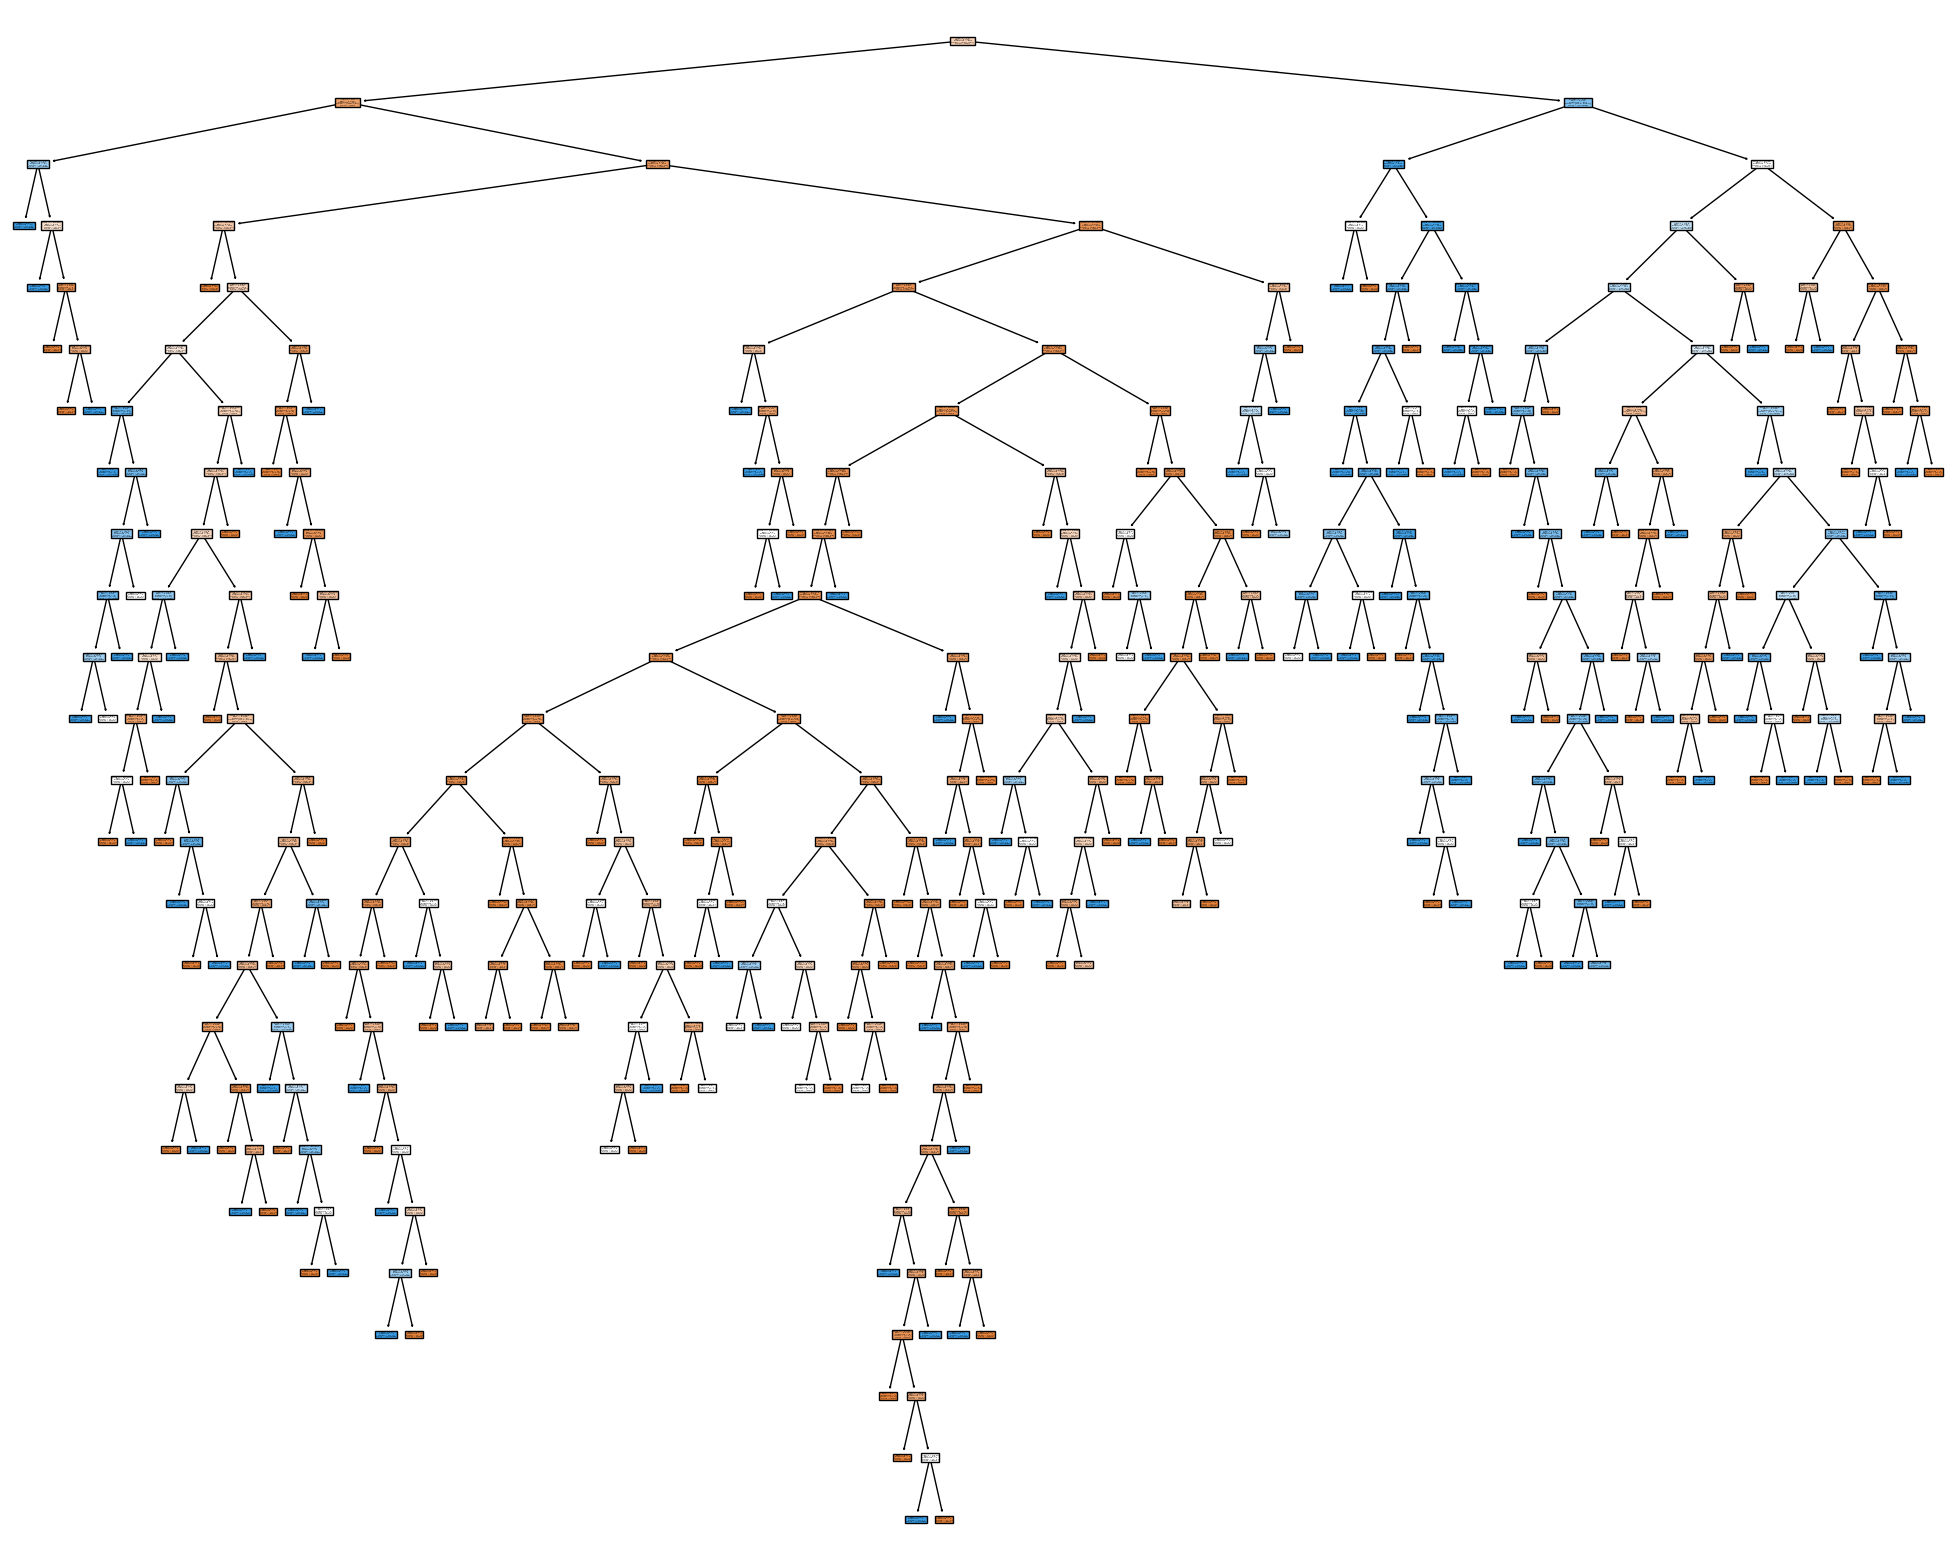

In [21]:
text_representation = export_text(clf)  # Use export_text directly
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf,
               feature_names=inputs.columns,
               class_names=['Died', 'Survived'],
               filled=True)

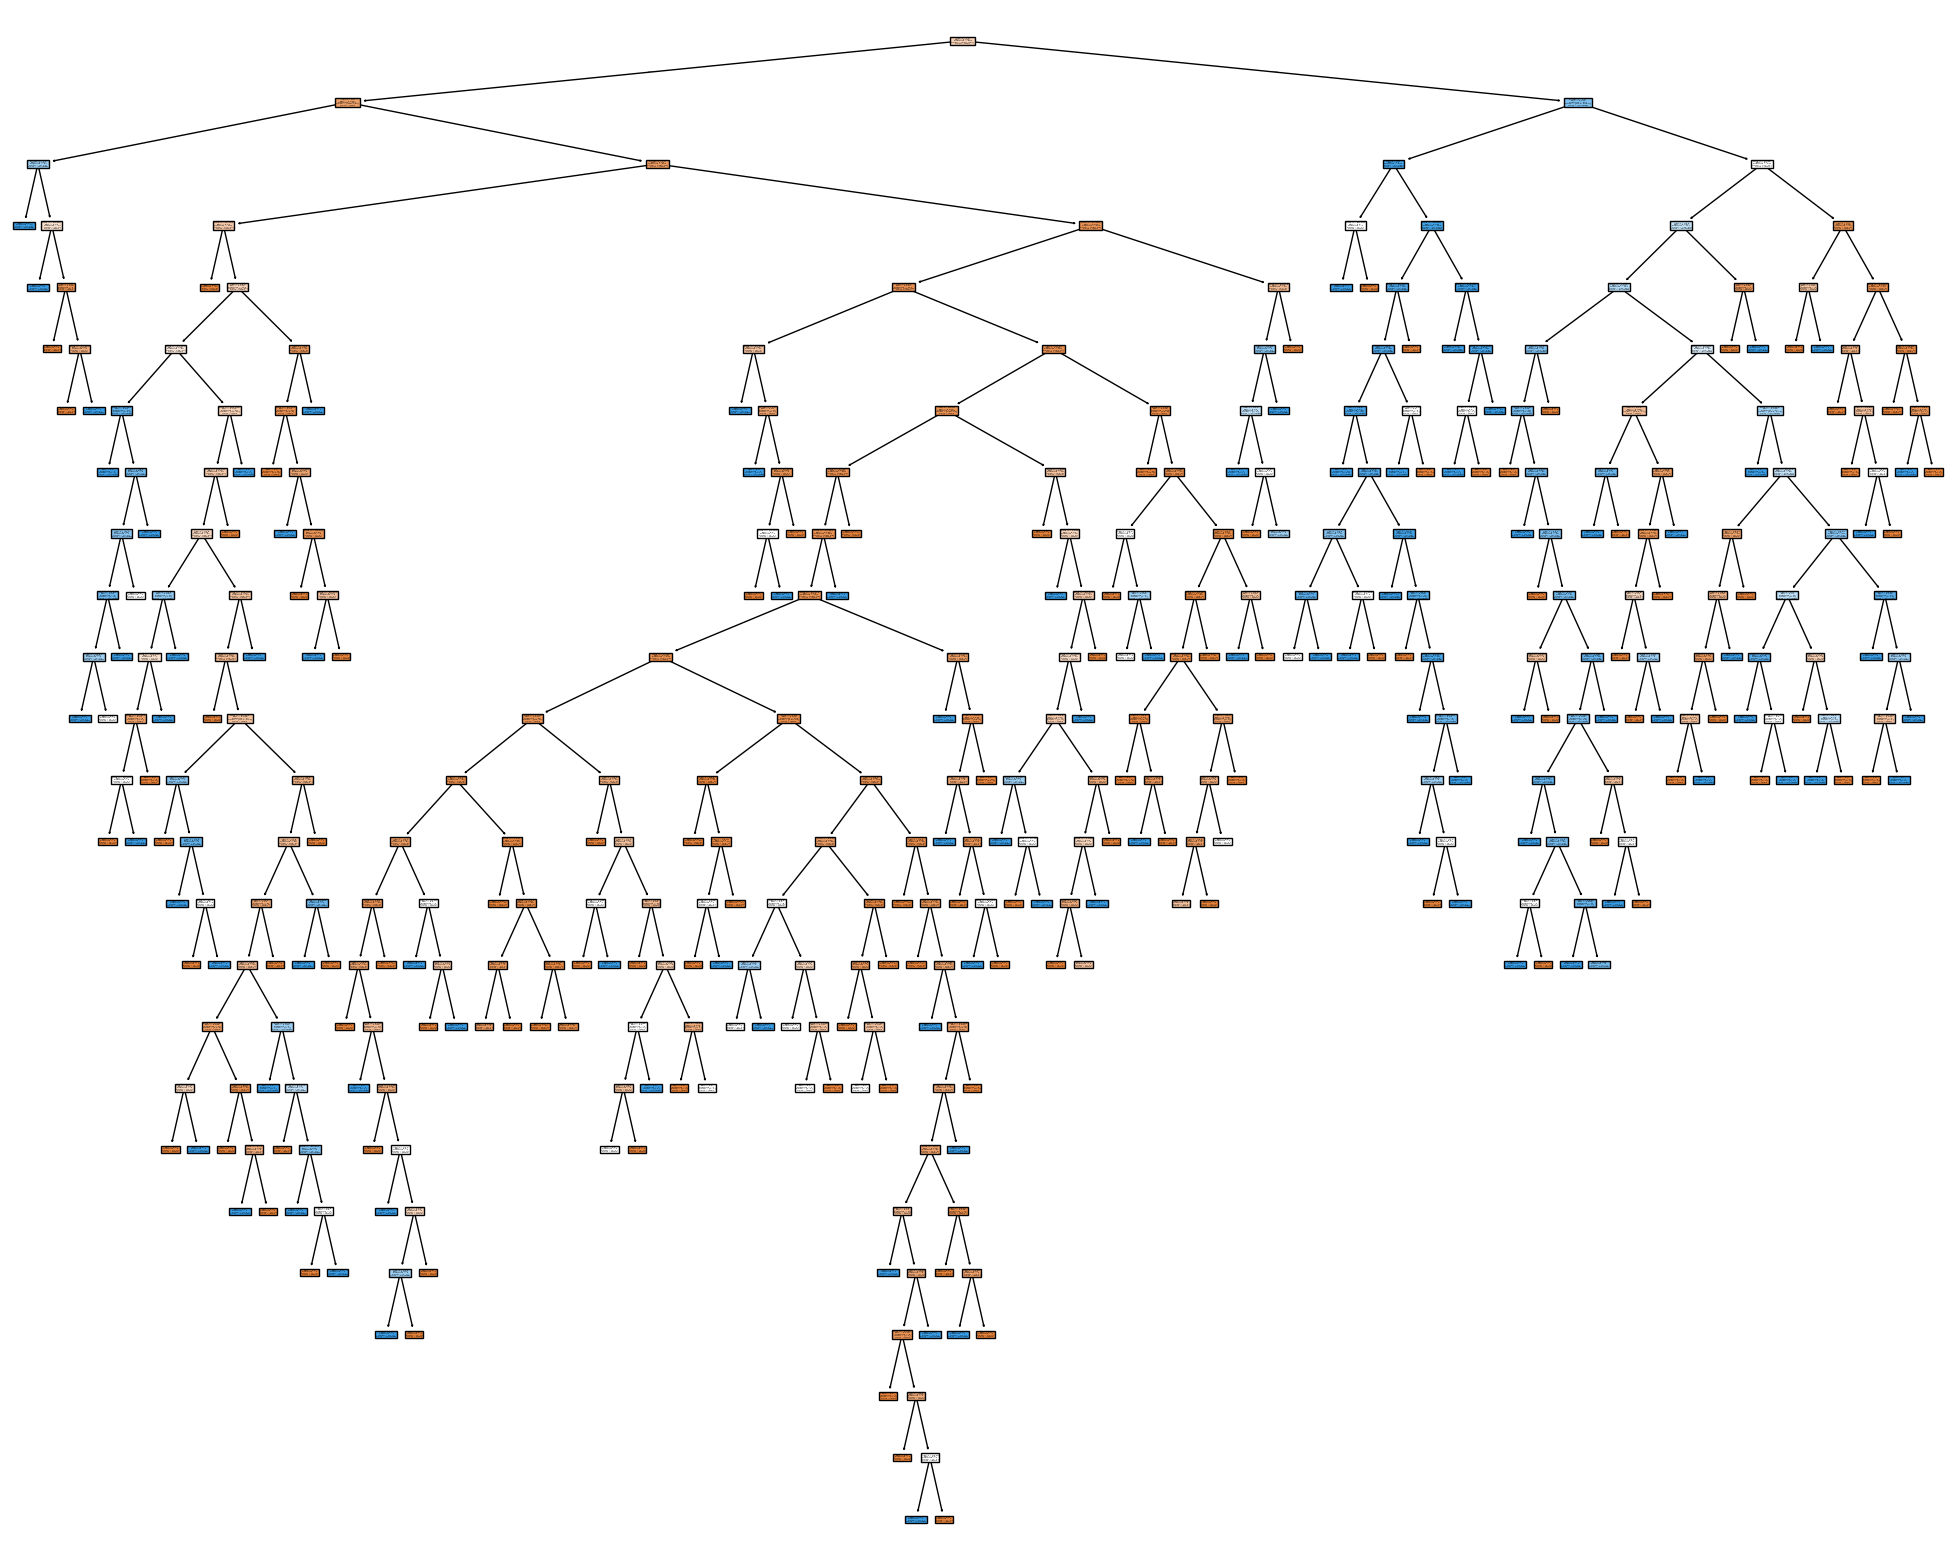

In [23]:

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(clf,
               feature_names=inputs.columns,
               class_names=['Died', 'Survived'],
               filled=True)

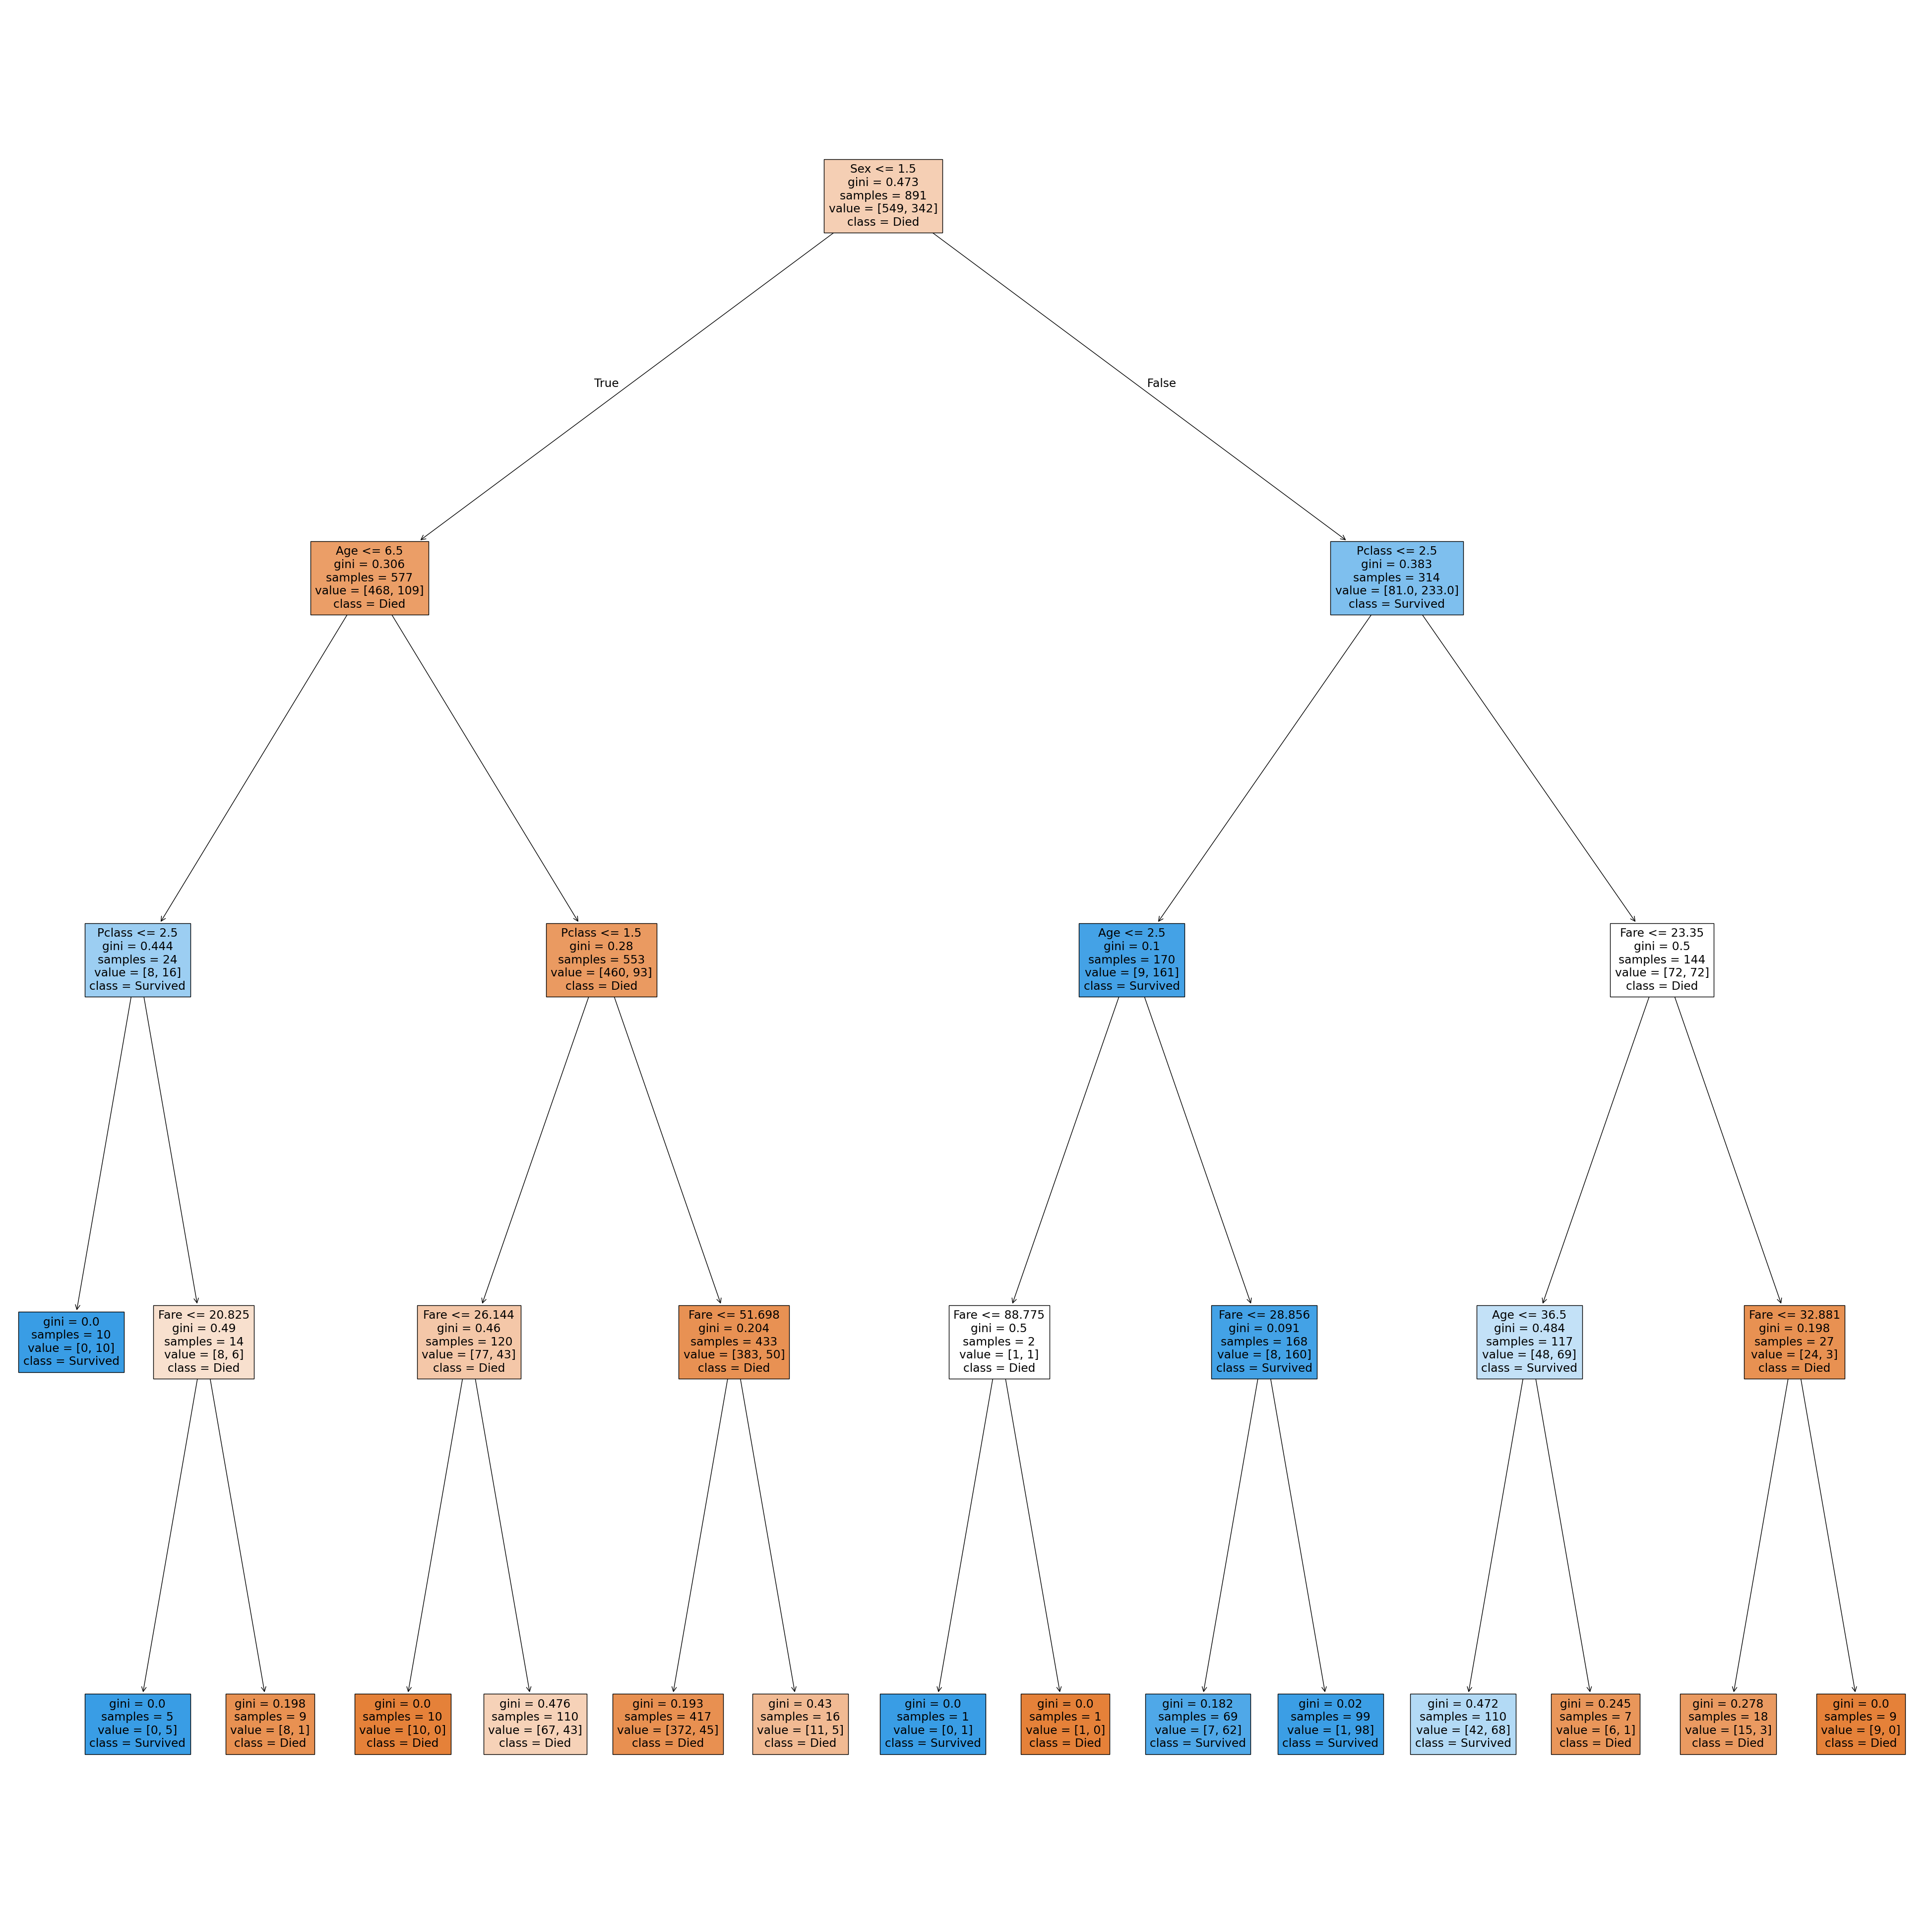

In [38]:
clf = DecisionTreeClassifier(max_depth=4) # Limit the depth to 4
model = clf.fit(inputs, target)

# Plotting the tree
fig = plt.figure(figsize=(50,50))
_ = plot_tree(clf,
              feature_names=inputs.columns,
              class_names=['Died', 'Survived'],
              filled=True,
              max_depth=4) # Limit the depth in the plot as well
plt.show()

In [39]:
# Assuming you want 'target_names' to represent the labels of your target variable
target_names = ['Died', 'Survived']  # Define target_names before using it
print(target_names)

['Died', 'Survived']


In [37]:
print(inputs.columns)  # Print the column names of the 'inputs' DataFrame

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [34]:
X = inputs
y = target

In [35]:
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [36]:
# creating a RF classifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.7910447761194029


In [40]:
from sklearn.metrics import classification_report
# Assuming 'y_test' and 'y_pred' are defined from your model prediction
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Died       0.84      0.83      0.83       167
    Survived       0.72      0.73      0.73       101

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [31]:
print(df.head()) # Replace 'data' with 'df' which is the DataFrame you previously used

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500


In [30]:
# predicting which type of flower it is.
clf.predict([[3, 3, 2, 2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
# using the feature importance variable
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=inputs.columns).sort_values(ascending=False) # Use 'inputs' instead of 'input'
feature_imp

,0
Sex,0.601293
Pclass,0.227401
Fare,0.097781
Age,0.073524
